# Machine Learning 2018.3
> - **Lista 3**
- **Lucas Lopes Felipe** - *PPGI*
- **Turma**: *CPS-863 / COS-623 / MAB-608*
- **Professores**: Edmundo, Daniel S. Menascé e Rosa Leão

## Base de Dados

> As características dos dados fornecidos são: idade do paciente, peso (kg), carga final (watts) e VO$_2$ máximo (mg/Kg/min). Fornecemos um ($1$) arquivo com dados de $1.172$ pacientes coletados pelo Professor e sua equipe: *Dados-medicos.csv*.

In [1]:
import pandas as pd
df = pd.read_csv('./data/Dados-medicos.txt', sep=" ")
df.head()

,Idade (anos),Peso (kg),Carga Final,VO2 medido máximo (mL/kg/min)
0,49,79.1,250.0,49.051833
1,30,52.4,177.0,41.603053
2,56,65.8,140.0,32.674772
3,29,78.0,400.0,59.102564
4,49,69.2,242.0,48.410405


> Antes de fazer as questões Você deve escolher **aleatoriamente** um subconjunto de 1.000 amostras para treinar os modelos e as 172 restantes serão usados para testar o modelo. Indique, no início do seu relatório, o vetor de índice das amostra escolhidas para treinamento e para teste. (Por exemplo: vetor de treinamento $t = \langle 1, 0, 0, 1, 1, 1, 0, . . .\rangle$, onde $t(i) = 1$ se a i-ésima amostra foi escolhida para treinamento, e $t(i) = 0$ para teste.

Train: 1000 / Test: 172 / Total: 1172

Separação entre Treino (Branco) e Teste (Preto) dispostos em uma matriz 34 x 35


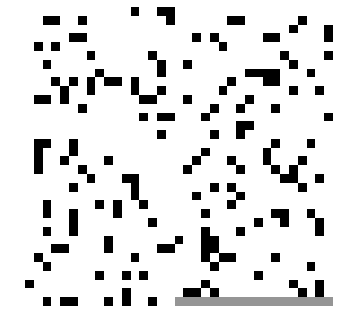

In [26]:
import numpy as np # Biblioteca para Algebra Linear
import matplotlib.pyplot as plt # Biblioteca para Plot
import seaborn as sns # Biblioteca de Visualização de Dados baseado no Matplotlib
plt.style.use('seaborn') # Estilo de gráfico

def filter(total, test):
    t = np.ones(total, dtype=int)
    i = test
    while i > 0:
        pos = np.random.randint(total)
        if t[pos] == 1:
            t[pos] = 0
            i -= 1
    return (t == 1)

t = filter(1172, 172)    
train = df[t]
test  = df[~t]

print('Train:', len(train), '/ Test:', len(test), '/ Total:', len(df))

d  = int(np.ceil(np.sqrt(len(t))))
tm = np.append(t * 1, np.full(len(t) % d + 1, .5))
tm = np.reshape(tm, (d - 1, d))

print('\nSeparação entre Treino (Branco) e Teste (Preto) dispostos em uma matriz', d - 1, 'x', d)
plt.grid(False)
plt.axis('off')
plt.imshow(1 - tm)

## Questão 1

#### 1. Considere as colunas $3$ e $4$ ($\mathrm{carga}$ e $\mathrm{VO}_{2max}$) dos dados fornecidos. Seja $p(y \mid x, \theta) = \mathcal{N}(y \mid w^T \phi(x), \sigma^2)$ onde $y$ é o $\mathrm{VO}_{2max}$, $x = \mathrm{carga}$  e $\phi(x) = 1, x,..., x^d$. Use regressão linear e ache os parâmetros do modelo.

In [3]:
import numpy as np

def phi(x, d):
    v = []
    for i in range(d + 1):
        v.append(x ** i)
    return np.array(v, dtype=float).T

def linear_regression(X, y):
    XTX     = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    XTy     = X.T.dot(y)
    theta   = XTX_inv.dot(XTy)
    return theta

X_train = np.array(train['Carga Final'])
y_train = np.array(train['VO2 medido máximo (mL/kg/min)'])

- experimente diferentes valores de $d$.

In [4]:
Ds = [1, 4, 5, 7, 9]

phis = []
for d in Ds:
    phis.append(phi(X_train, d))
    
thetas = []
for p in phis:
    thetas.append(linear_regression(p, y_train))
    
plot_space = np.linspace(min(X_train), max(X_train))
    
linspaces = []
for d in Ds:
    linspaces.append(phi(plot_space, d))

models = []
for l, t in zip(linspaces, thetas):
    models.append(l.dot(t))

- plote as funções encontradas, junto com os dados de treinamento.

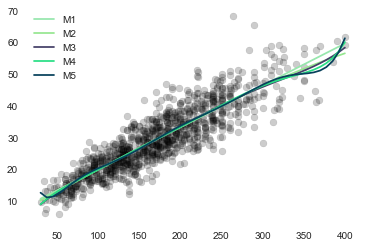

In [25]:
plt.scatter(X_train, y_train, c='k', alpha=0.2)

def randc():
    c = ()
    for i in range(3):
        r = np.random.uniform(0, 1)
        c += (r,)
    return c

for i, m in enumerate(models):
    lb = 'M' + str(i + 1)
    plt.plot(plot_space, m, c=randc(), label=lb)

plt.legend()
plt.gca().set_facecolor('w')
plt.show()

In [6]:
def mse(y_pred, y_true):
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

predictions = []
for p, t in zip(phis, thetas):
    predictions.append(p.dot(t))

for i, y in enumerate(predictions):
    print('Erro do Modelo', i + 1, '( d =', Ds[i], ') no Treinamento:', mse(y, y_train))

Erro do Modelo 1 ( d = 1 ) no Treinamento: 24.847404171463502
Erro do Modelo 2 ( d = 4 ) no Treinamento: 24.73273957556782
Erro do Modelo 3 ( d = 5 ) no Treinamento: 24.691034813434097
Erro do Modelo 4 ( d = 7 ) no Treinamento: 24.6622155235245
Erro do Modelo 5 ( d = 9 ) no Treinamento: 24.545581231028326


- qual é o $NLL(w)$ encontrado em cada caso? Explique.

$$ \text{NLL} ({\bf \theta}) = - \sum_{i=1}^{N} \log p(y_i \mid {\bf x}_i, {\bf \theta}) $$

- compare os valores previstos pelo modelo escolhido com os valores reais dos dados de teste. Você está satisfeito com o modelo escolhido?

In [7]:
X_test = np.array(test['Carga Final'])
y_test = np.array(test['VO2 medido máximo (mL/kg/min)'])

phis_test = []
for d in Ds:
    phis_test.append(phi(X_test, d))
    
predictions_test = []
for p, t in zip(phis_test, thetas):
    predictions_test.append(p.dot(t))

for i, y in enumerate(predictions_test):
    print('Erro do Modelo', i + 1, '( d =', Ds[i], ') no Teste:', mse(y, y_test))

Erro do Modelo 1 ( d = 1 ) no Teste: 27.025665756010245
Erro do Modelo 2 ( d = 4 ) no Teste: 27.616046460821508
Erro do Modelo 3 ( d = 5 ) no Teste: 28.585971332588162
Erro do Modelo 4 ( d = 7 ) no Teste: 34.30534695862052
Erro do Modelo 5 ( d = 9 ) no Teste: 42.39852859972987


Durante o treinamento, os modelo de maior grau polinomial ficaram com o menor erro. Porém, durante o teste, estes tiveram desempenho pior do que o de grau 1, que foi capaz de ter uma melhor generalização.

Isso se da pelo overfitting, onde, apesar dos outros modelos se adequarem bem ao conjunto de treinamento, não foi capaz de generalizar o suficiente para o de teste.

#### 2. Repita o item anterior considerando as colunas 2, 3 e 4 (peso, carga e VO$_{2max}$).

In [8]:
X_train_2 = np.array(train[['Peso (kg)', 'Carga Final']])
X_test_2  = np.array(test[['Peso (kg)', 'Carga Final']])

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
x_poly   = poly_reg.fit_transform(X_train_2)

model = LinearRegression()
model.fit(x_poly, y_train)

pred = model.predict(poly_reg.fit_transform(X_test_2))

print('Erro do Modelo que utiliza Peso e Cargo no Teste:', mse(pred, y_test))

Erro do Modelo que utiliza Peso e Cargo no Teste: 11.03145123683076


#### 3. Repita o item anterior considerando as colunas 1, 2, 3 e 4 (idade, peso, carga e VO$_{2max}$).

In [9]:
X_train_3 = np.array(train[['Idade (anos)', 'Peso (kg)', 'Carga Final']])
X_test_3  = np.array(test[['Idade (anos)', 'Peso (kg)', 'Carga Final']])

poly_reg = PolynomialFeatures(degree=7)
x_poly   = poly_reg.fit_transform(X_train_3)

model.fit(x_poly, y_train)

pred = model.predict(poly_reg.fit_transform(X_test_3))

print('Erro do Modelo que utiliza Idade, Peso e Carga no Teste:', mse(pred, y_test))

Erro do Modelo que utiliza Idade, Peso e Carga no Teste: 42.03906174339161


- Você acha que alguma das variáveis é menos importante para se estimar o VO$_{2max}$? Ou todas são importantes? Explique.

De acordo com os resultados apresentados pelos modelos, cujo utilizam diferentes *features*, acrescentar a variável 'Peso (Kg)' teve um significativo aumento de desempenho na predição. Porém, o mesmo não ocorre ao adicionar a variável 'Idade (anos)'.

A partir disto, podemos concluir que o valor $VO_{2max}$ não é fundamentalmente determinado pela idade, mas possui razoável influência quanto ao peso.

#### 4. O VO$_{2max}$ pode ser estimado pela seguinte equação de acordo com o _American College of Sports Medicine_: VO$_{2max} \approx (W \times 11.4 + 260 + peso \times 3, 5) \, / \, peso$, onde $W$ é a carga máxima em watts, o peso corporal é em kg e a constante de 260 mL/min indica o volume de oxigênio correspondente ao gasto energético necessário para mover os pedais do teste de esforço sem qualquer resistência adicionada.

- Compare essa equação com a do modelo que você obteve considerando carga e peso.

In [10]:
def VO_2max(W, peso):
    return (W * 11.4 + 260 + peso * 3.5) / peso

pred_ACSM = []
for x in X_test_2:
    pred_ACSM.append(VO_2max(x[1], x[0]))
    
print('Erro do Modelo baseado na equação do ACSM para os dados de Teste:', mse(pred_ACSM, y_test))

Erro do Modelo baseado na equação do ACSM para os dados de Teste: 11.010167530079455


- Qual a vantagem que você obteve (se existe alguma) com a equação considerando a idade? Exemplifique.

O erro do Modelo que considera **Idade** é muito maior à equação utilizada pelo ACSM. Porém, o Modelo que utiliza apenas **Peso** e **Carga** apresentou predição similar à equação.

## Questão 2
> Considere agora que o modelo a ser usado é uma Gaussiana multivariada.

#### 1. Use as colunas 2, 4 (carga e VO$_{2max}$). Neste caso $x$ é bidimensional.
- Ache os parâmetros da Gaussiana.

- Plote os resultados. Os seu gráfico deve ser semelhante (na ideia) ao da Figura $7.1$ (Murphy).

#### 2. Use as colunas 2, 3 e 4 (peso, carga e VO$_{2max}$).
- Ache os parâmetros da Gaussiana.

- Escolha 3 valores de peso e carga e estime o VO$_{2max}$ (como a variável VO$_{2max}$ é contínua, explique como você faria essa estimativa).

- Compare com os resultados da equação do _American College of Sports Medicine_ com os resultados deste modelo e da questão anterior. Explique.

#### 3. Use toda a informação dada, isto é, colunas 1, 2, 3 e 4 (idade, peso, carga e VO$_{2max}$), ache os parâmetros do modelo, explicando o que foi feito para achar os parâmetros. Nota: “o que foi feito” não significa “incluir código” na resposta, mas sim mostrar que você conhece os passos para se obter a solução.

- Esse seu modelo faz uma melhor ou pior previsão dos dados do teste?

- Compare o que você pode prever com esse e o modelo da questão anterior.

## Questão 3

#### 1. Suponha que você quer obter modelos para 3 faixas de idade: $ id_1 = [18 - 40), id_2 = [40 - 60), id_3 \geq 60$.
- Construa 3 modelos Gaussianos diferentes (multivariados).

- Comente as diferenças entre os modelos, se houver, com o objetivo de prever o VO$_{2max}$).

#### 2. Suponha que o nosso objetivo é classificar os dados em uma das 3 faixas de idades do item anterior $ id_1 = [18 - 40), id_2 = [40 - 60), id_3 \geq 60 $. Mostre (explique) como você irá construir um _Naive Bayes Classifier_ baseado no modelo Gaussiano, isto é, para uma _feature_ $j$ e faixa de idade $c$:

$$p(x_j \mid h = c, \theta_{jc}) = \mathcal{N}(x_j \mid y = c, \mu_{jc},\sigma^2_{jc})$$

#### como visto em classe. Comece escrevendo uma expressão para $p(x_i, y_i = c_j \mid \theta)$, onde $x_i$ é o vetor de features (no caso, peso, carga e VO$_{2max}$) e a classe é a idade.

#### 3. Quais a suposição básica feita para um _Naive Bayes Classifier_?

- Essa suposição é feita no caso do modelo Gaussiano multivariado da Questão 2?

#### 4. Mostre como calcular os parâmetros do modelo _Naive Bayes Classifier_. É parte da questão obter o MLE, o que vai permitir obter os parâmetros do seu modelo.

#### 5. Construa um _Naive Bayes Classifier_ com 3 classes de idade conforme acima, e treine o seu modelo com 1000 amostras escolhidas aleatoriamente dos dados desta lista.

- Você consegue prever adequadamente a faixa etária do restante dos dados? Caso positivo, Como?

#### 6. Você conseguiria prever adequadamente a faixa etária, usando os 3 modelos Gaussianos construídos no início da questão? Sim? Não? Comente.

####  7. Você consegue prever a faixa etária dos dados de teste usando o seu modelo Gaussiano da questão 2 construído com todas as _features_? Sim? Não? Comente.

## Questão 4
> O objetivo desta questão é usar construir um modelos supervisionado com uma mistura de 3 Gaussianas, usando os dados do problema.

#### 1. Neste modelo, todas as variáveis são observadas. Considere que os dados são da forma $\langle x_i, z_i \rangle$ onde $x_i$ tem dimensão 3 (peso, carga, VO$_{2max}$) e $z_i$ é uma das 3 faixas de idade $ id_1 = [18 - 40), id_2 = [40 - 60), id_3 \geq 60$.

#### 2. Explique, em linhas gerais, os passos feitos para encontrar os parâmetros do modelo. Como anteriormente, escolha o conjunto de treinamento de 1000 dados e outro para testes.

#### 3. Para cada um das amostras $i$ de teste, estime a probabilidade de se obter o VO$_{2max}$. (Como as variável VO$_{2max}$ é contínua, explique como você faria essa estimativa.)

#### 4. Compare o modelo obtido nesta questão com o modelo obtido na questão anterior. É parte da questão justificar sua escolha de como comparar os resultados/modelos.

#### 5. Tanto o modelo _Naive Bayes_ como o modelo de mistura de Gaussianas são generativos. A partir do melhor modelo obtido, explique como gerar e gere um conjunto de 10 valores de VO$_{2max}$, de um determinado conjunto de _features_ escolhidas de um dos dados de teste.

- Compare os 10 valores gerados com o valor de VO$_{2max}$ do dado de teste escolhido.